# Linear Regression-Prediction using Supervised ML

Task1, Graduate Rotational Internship (GRIP), The Sparks Foundation, Batch-GRIPMARCH23

# Problem Statement

Predict the percentage of an student based on the no. of study hours. What will be predicted score if a student studies for 9.25 hrs/ day?

The task can be solved using Simple Linear Regression on the given dataset.

# Author

Sanjana Bhakat

In [9]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
#importing data from an external link
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("Data imported successfully")
data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Exploring the Dataset 

In [11]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
data.mode()

,Hours,Scores
0,2.5,30.0
1,2.7,NaN


We see that the average number of hours studied by a student in the given dataset is 2.5 and the average score is approximately 51. However, from the mode we find that most students study around 2.5 or 2.7 hours but score around 30.

# Data Visualisation

We now use various plots to get a visual idea of the relationship between the data. First, we create a scatter plot using:

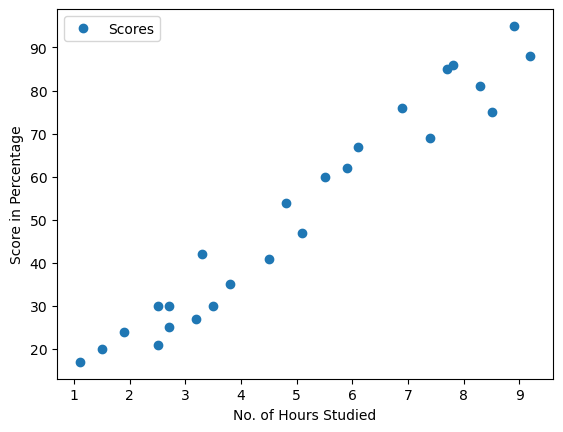

In [13]:
data.plot(x="Hours",y="Scores",style='o')
plt.xlabel("No. of Hours Studied")
plt.ylabel("Score in Percentage")
plt.show()

The scatter plot shows us that there exists a positive linear relationship between the data values i.e the scores and the number of hours studied. 

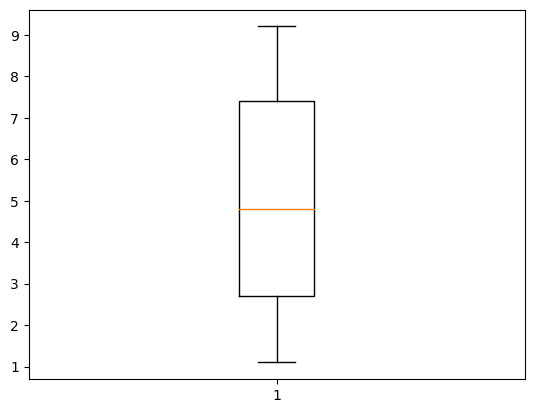

In [14]:
plt.boxplot(x=data['Hours'])
plt.show()

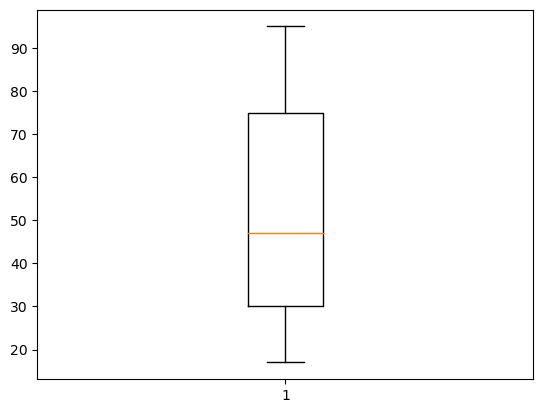

In [15]:
plt.boxplot(x=data['Scores'])
plt.show()

The first boxplot shows that most of the data in the hours column is found within the range 2.5-7.5. The second boxplot shows that most of the data in the scores column is found within the range 30-75. The data outside the specified ranges form outliers.

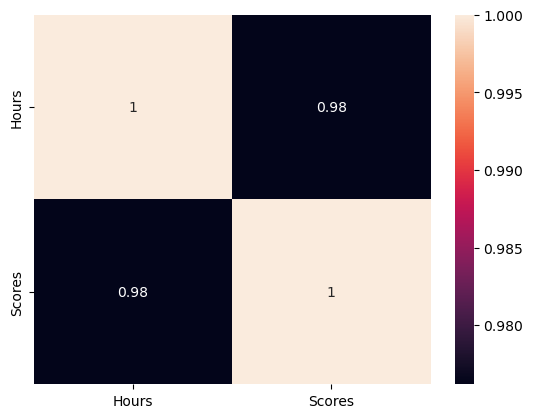

In [16]:
annot=True
hm=sns.heatmap(data=data.corr(), annot=annot)
plt.show()

The above heatmap shows the correlation between the two columns. It is evident that both the columns are highly correlated and a linear relationship exists between them. Hence, linear regression model will be suitable for making predictions using this data.

# Classifying/Preparing the data

To prepare the data for training, we need to classify the data into attributes and labels. 
The label is the variable we are predicting i.e the Score in percentage (represented here by the Y variable). 
The attribute is the feature or the input variable i.e the Number of Hours Studied (represented here by the X variable).


In [70]:
X=data.iloc[:,:-1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [71]:
Y=data.iloc[:,1].values
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Hence, we get the attributes and the labels. Next, we need to divide the data into a testing set and a training set. To do so, we use the train_test_split function from the scikit-learn library. We split the data in 80:20 ratio.

In [72]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [73]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

# Training the algorithm

Now that we have the training set and the testing set, we need to train our model. As we have seen earlier, a positive linear relationship exists between the data and hence, we use Linear Regression to train our model.

In [74]:
model=LinearRegression()
model.fit(X_train,Y_train)
print("Model training completed.")

Model training completed.


In [75]:
r_square=model.score(X_train,Y_train)
print(f"Co-efficient of determination:{r_square}")

Co-efficient of determination:0.9515510725211552


The co-efficient of determination or r-square gives us the percentage variation in the variable "Score" i.e Y_train or the dependent variable in the training set which is accounted for by the variable "Hours" i.e X_train in the training set or the independent variable.

In [76]:
print(f"Intercept:{model.intercept_}") 
print(f"Slope:{model.coef_}")        

Intercept:2.018160041434683
Slope:[9.91065648]


Through linear regression we are trying find the equation of the line of Y on X i.e Y=aX+b where a is the Slope and b is the Intercept. Upon putting the values of a and b the equation of the line here becomes: Y=9.91065648*X+2.018160041434683. 

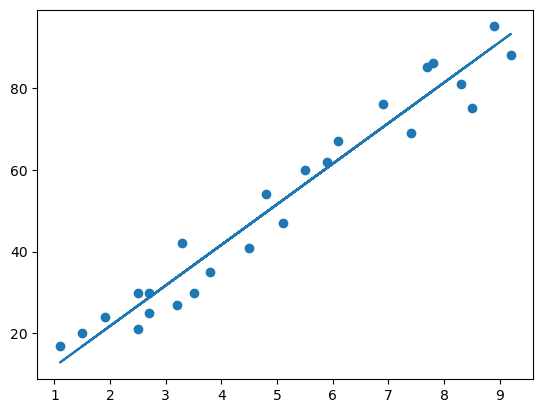

In [77]:
line=model.coef_*X+model.intercept_
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

Here, we plot the line of regression of Y on X. We first plot the scatter plot of the training set. Then, we calculate values of Y for given values of X from the last equation and plot the line using the predicted values of Y.

# Prediction on the testing set

Using the model, we now predict the values of Y for the testing set and also tabulate the actual and the predicted values.

In [78]:
predict_y=model.predict(X_test)
print(predict_y)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [79]:
df=pd.DataFrame({'Actual Score':Y_test,'Predicted Score':predict_y})
df

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Calculating Errors

Now, we calculate the errors in our prediction. That is, we compare the values of the predicted scores with the actual scores and use relevant metrics to find the error.

In [80]:
errors=list()
for i in range(len(Y_test)):
    err=abs((df['Actual Score'][i]-df['Predicted Score'][i]))
    errors.append(err)
print(f"Errors on comparing Actual and the Predicted scores:\n{errors}")

Errors on comparing Actual and the Predicted scores:
[3.115855237601963, 6.732260779489842, 6.3570179981872315, 3.2051987569597244, 1.5089667227761154]


There are many metrics that can be used to calculate the error of a linear regression model. We use the mean absolute error for this model. 

In [81]:
from sklearn import metrics
error=metrics.mean_absolute_error(Y_test,predict_y)
print(error)

4.183859899002975


Next, we plot the predicted scores and the actual scores of the training set to get a visual idea of the deviation from original ones.

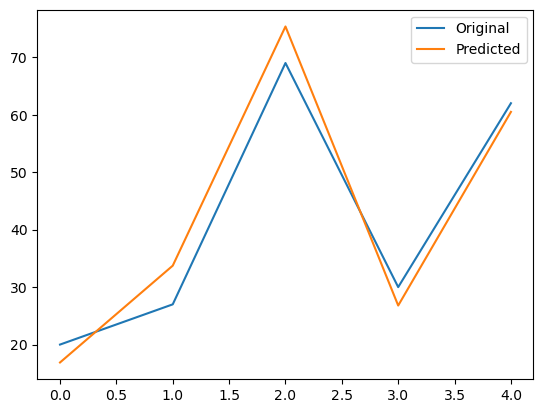

In [82]:
plt.plot(Y_test,label='Original')
plt.plot(predict_y,label='Predicted')
plt.legend()
plt.show()

# Prediction using User Inputs

As stated in the problem statement, we now find the predicted score if a student studies for 9.25 hours.

In [83]:
hours=9.25
score_new_pred=model.predict([[hours]])
print(f"Predicted Score if the student studies for 9.25 hours:{score_new_pred}")

Predicted Score if the student studies for 9.25 hours:[93.69173249]


Next, we take an user input and predict the score based on it using our model.

In [84]:
hrs= float(input("Enter number of hours studied per day:"))
if (hrs<=24):
    
    pred_score=model.predict([[hrs]])
    print("Predicted Score:")
    print(pred_score)
else:
    print("Please enter valid number of hours")

Enter number of hours studied per day:7
Predicted Score:
[71.39275541]


# Conclusion

Using Linear Regression on the dataset given in the problem statement we get the following results:


1. If a student studies for 9.25 hours, his predicted score will be 93.69173249( approximately 94).

2. The average error in our model is 4.183859899002975

3. To reduce the error, we need to introduce more features or parameters in the dataset. Features like "Self Study Time", "Parental level of education", "Test Preparation courses" etc can be added to the dataset to make the prediction more accurate.

5. The linear regression model has certain flaws. For example, if we increase the number of hours in the user input for example: 12, then the predicted score becomes approximately 121 which is impractical since scores are mentioned in the data as percentages and percentage cannot exceed 100.
To solve this, we can transform the data to standard normal form. But the above model can suffice for most cases.

# Thank You